In [1]:
#Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10

Using TensorFlow backend.
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sfm/.local/lib/python3.6/site-packages/tensorflow/python/framework/d

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

#  Visualize data

[7]


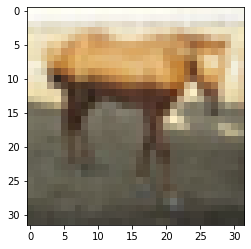

In [9]:
i = 2000
plt.imshow(x_train[i])
print(y_train[i])

/home/sfm/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


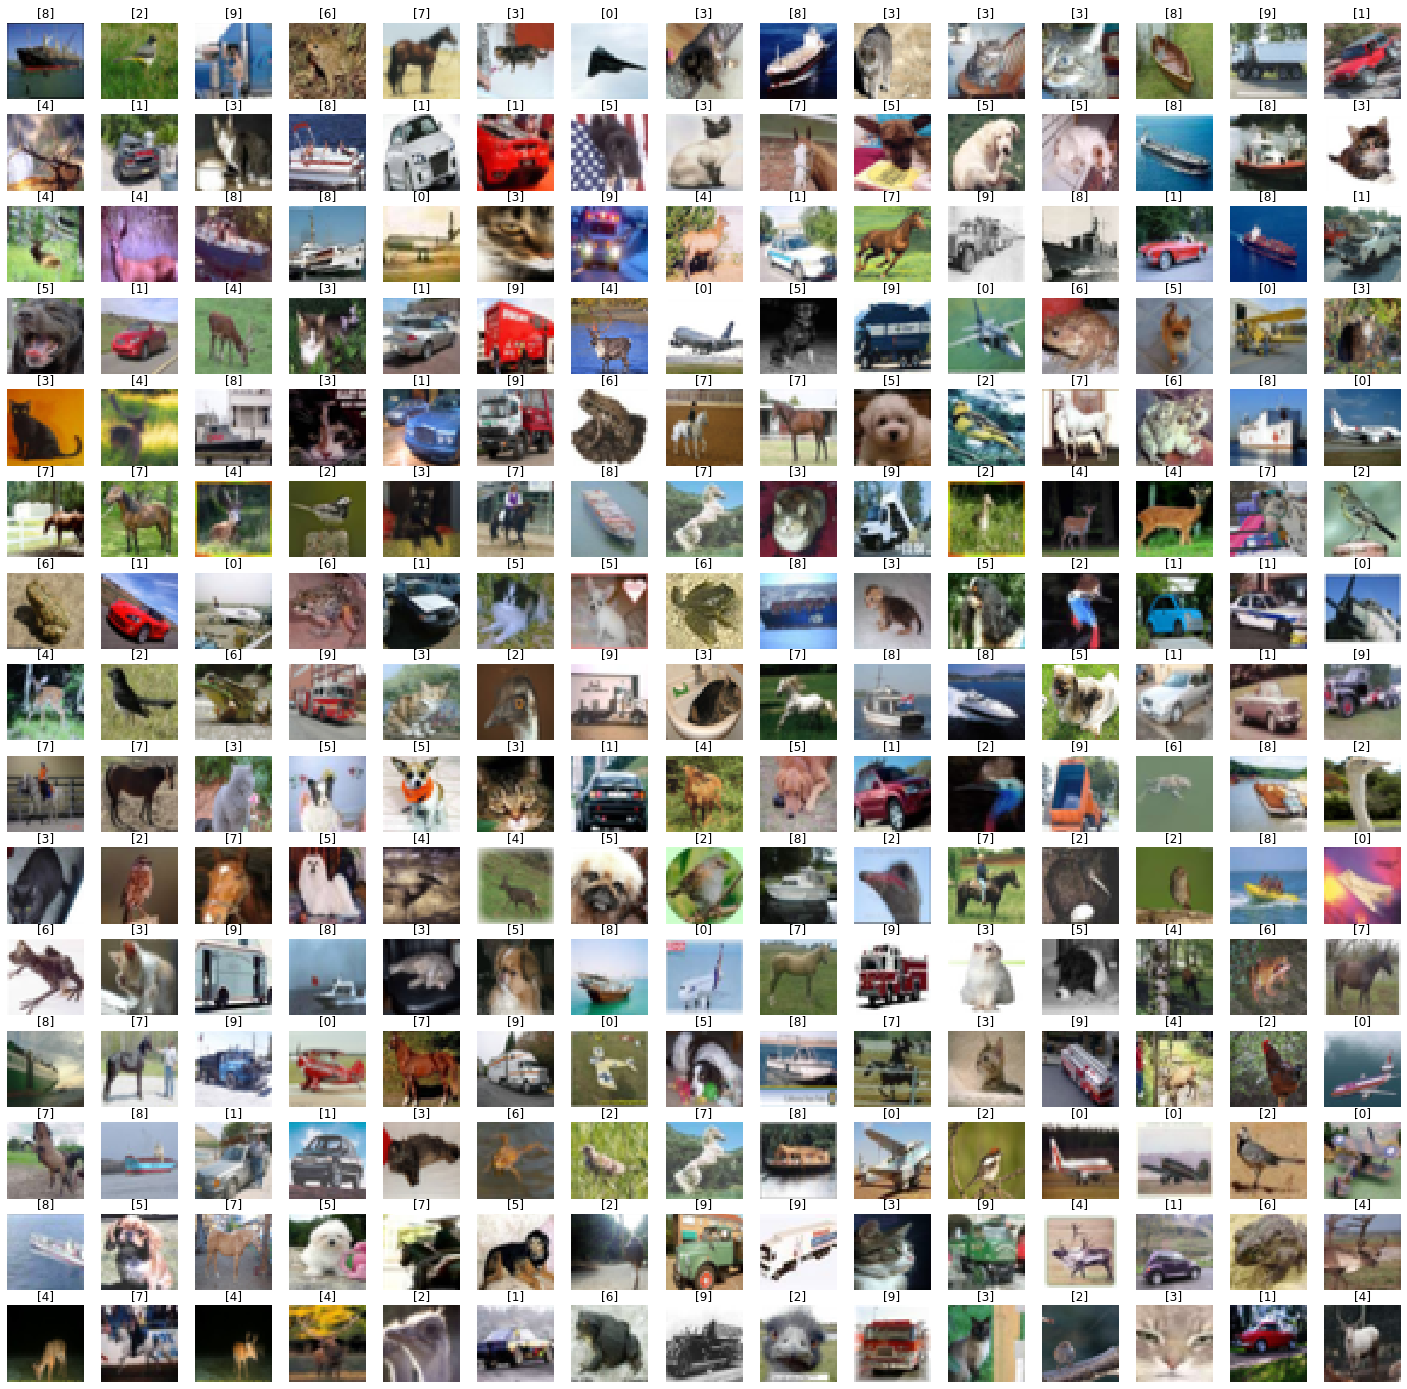

In [10]:
L_Axes = 15
W_Axes = 15

fug, axes = plt.subplots(L_Axes, W_Axes, figsize=(25, 25))
axes = axes.ravel()

n_number = len(x_train)

for i in np.arange(0, L_Axes * W_Axes):
    index = np.random.randint(0, n_number)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    

In [11]:
x_train = x_train.astype(float)

In [12]:
x_test = x_test.astype(float)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
import keras
y_train = keras.utils.to_categorical(y_train)

In [16]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test)

In [18]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [19]:
inputs = x_train.shape[1:]

In [20]:
inputs

(32, 32, 3)

In [21]:
inputs

(32, 32, 3)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten,Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard


In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape= inputs, activation='relu'))
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=inputs))
cnn_model.add(MaxPool2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape= inputs))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=inputs))
cnn_model.add(MaxPool2D(2,2))
cnn_model.add(Dropout(0.2))


cnn_model.add(Flatten())

cnn_model.add(Dense( units=512,activation='relu'))
cnn_model.add(Dense(units=512, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))


In [24]:
cnn_model.compile(optimizer=keras.optimizers.rmsprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = cnn_model.fit(x_train, y_train, batch_size =32, epochs =2, shuffle=2)


Epoch 1/2
50000/50000 [==============================] - 100s 2ms/step - loss: 1.4542 - accuracy: 0.4825
Epoch 2/2
50000/50000 [==============================] - 104s 2ms/step - loss: 1.1038 - accuracy: 0.6224


In [26]:
evaluation_result = cnn_model.evaluate(x_test,y_test)
print('Evaluation {}', evaluation_result[1])

10000/10000 [==============================] - 5s 502us/step
Evaluation {} 0.6240000128746033


In [27]:
predicted_classess = cnn_model.predict_classes(x_test)
print(predicted_classess)

[3 8 8 ... 5 4 7]


In [28]:
y_test = y_test.argmax(1)

In [29]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

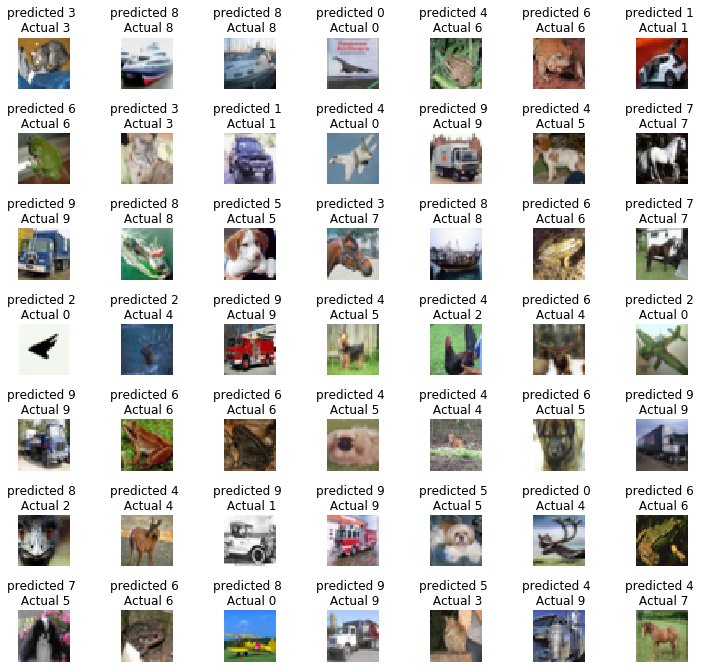

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("predicted {} \n Actual {}".format( predicted_classess[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)


In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cn = confusion_matrix(y_test, predicted_classess)
cn



array([[555,   3, 138,  19,  68,   3,  19,   9, 154,  32],
       [ 29, 534,  17,  13,  18,   5,  75,   3,  78, 228],
       [ 30,   0, 560,  40, 200,  42,  83,  20,  22,   3],
       [ 12,   2,  94, 354, 218, 132, 124,  36,  22,   6],
       [  8,   1,  55,  31, 790,  12,  44,  47,  12,   0],
       [  5,   0, 108, 135, 186, 423,  61,  70,  12,   0],
       [  1,   0,  47,  35,  97,   4, 805,   1,   8,   2],
       [  4,   0,  56,  33, 162,  37,  22, 676,   2,   8],
       [ 45,   4,  25,  14,  18,   3,  21,   4, 839,  27],
       [ 30,  17,  28,  35,  38,   4,  41,  18,  85, 704]])

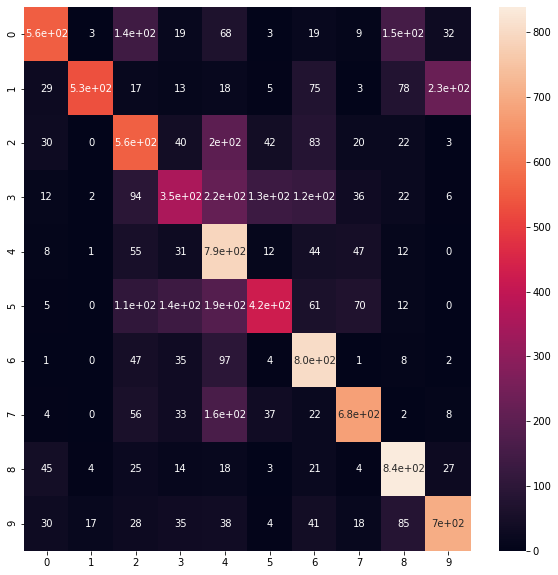

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(cn, annot=True)

# Saving the model

In [33]:
import os 

directory = os.path.join(os.getcwd(),'save_model')

if not os.path.exists(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'cnn_cifar10_trainded.h5')
cnn_model.save(model_path)

# Image Augmentation

In [34]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
            rotation_range=90,
            width_shift_range=0.1,
            horizontal_flip=True,
            vertical_flip=True
)

In [35]:
datagen.fit(x_train)

In [36]:
cnn_model.fit_generator(datagen.flow(x_train,y_train, batch_size=21), epochs=2)

Epoch 1/2
2381/2381 [==============================] - 125s 52ms/step - loss: 1.8054 - accuracy: 0.3529
Epoch 2/2
2381/2381 [==============================] - 126s 53ms/step - loss: 1.7327 - accuracy: 0.3803


In [38]:
import os 

directory = os.path.join(os.getcwd(),'save_model')

if not os.path.exists(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'cnn_cifar10_trainded_Augmented.h5')
cnn_model.save(model_path)